# Simple regression: iid(independent identical distribution) measurments and Scaler variables

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data generation - data loading

In [67]:
np.random.seed(2)
N = 1000
x = np.random.randn(N, 1)  # it creates 1000 sample with means 0 and standard deviation 1 that means standard normal distribution
y = 1 + 2*x + 0.1*np.random.randn(N, 1)
y.shape

(1000, 1)

plotting data

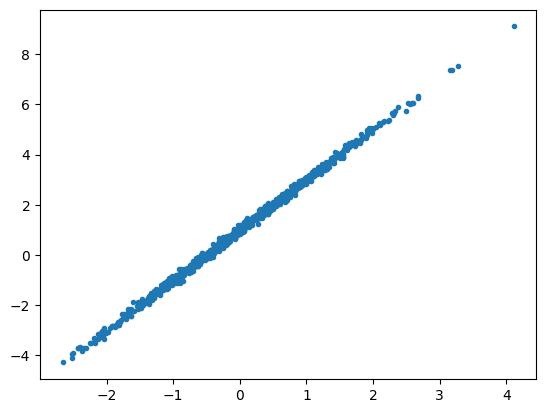

In [68]:
plt.plot(x, y, '.')
plt.show()

data preparing

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
one_train = np.ones((len(X_train), 1))  # because of w0
X_train = np.hstack((X_train, one_train))  # np.hstack and np.vstack
X_train

array([[ 0.04625552,  1.        ],
       [-1.23166449,  1.        ],
       [ 0.82112088,  1.        ],
       ...,
       [ 1.16152149,  1.        ],
       [-1.70753905,  1.        ],
       [-1.85040397,  1.        ]])

Parameters estimation using LS method

${dn} = \sum \limits_{i=0} ^ {end=1000} x_{i} y_{i}$ <br>

${num} = \sum \limits_{i=0} ^ {end=1000} x_{i}**2$

In [70]:
print('='*20, 'just for figure out what happens')
# print(X_train[0], '\n', Y_train[0])
# print(X_train[0] * Y_train[0])
print('='*20)
dn = 0
num = np.zeros((1, 2))
for i in range(len(X_train)):
    num += X_train[i]*Y_train[i]
    dn += X_train[i]**2

w = num/dn
w

==================== just for figure out what happens


array([[1.96143363, 0.92259757]])

Evaluate The Model

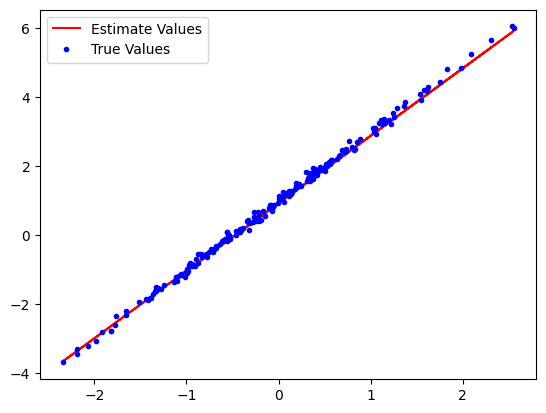

In [71]:
# y_pre ==> y was predicted
y_pre = w[0][1] + w[0][0] * X_test
plt.plot(X_test, y_pre, 'r')
plt.plot(X_test, Y_test, 'b.')
plt.legend(["Estimate Values", "True Values"])



Evaluation of Error

(200, 1)
-0.07591338387451743
0.09595988219110407


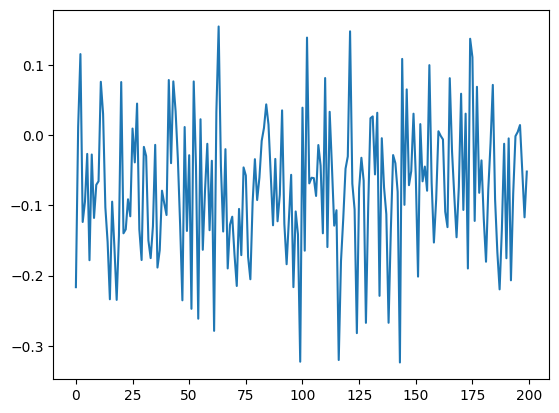

In [72]:
error = y_pre - Y_test
print(error.shape)
print(np.mean(error))  # as you can see the mean for error is likely to what was generated (0 for np.random.randn())
print(np.std(error))    # as you can see the standard deviation for error is likely to what was generated (0.1 for 0.1np.random.randn())
plt.plot(error)

### if the standard deviation of noise is so height the SL (square list) could not predict the good weights so, bayesian approach should be used

# Simple Regression with iid Measurements - Multivariate Case

## Data Generating or Data loading
because we don't have data here we generate it

In [73]:
np.random.seed(2)
N = 1000
x1 = np.random.randn(N, 1)  # x1 has mean 0 and standard deviation 1
x2 = 2 + np.random.randn(N, 1)  # x2 has mean 2 and standard deviation 1
x3 = 2*np.random.randn(N, 1)  # x3 has mean 0 and standard deviation 2
x4 = 2 + 2*np.random.randn(N, 1)  # x4 m 2 and sd 2
y = 0.5 - 3*x1 + 4*x2 + 3*x3 - 0.05*x4 + 0.5*np.random.randn(N, 1)
generated_weight = np.array((0.5, 3, 4, 3, -0.5 ))

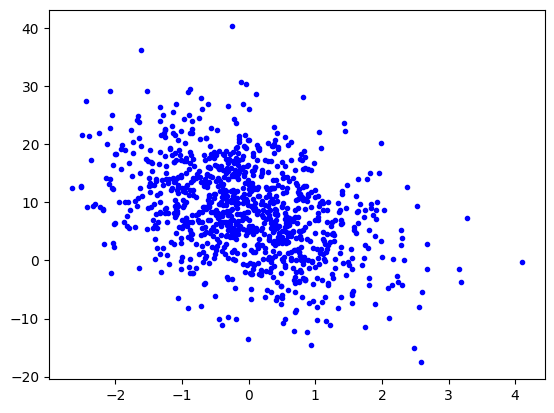

In [74]:
plt.plot(x1, y, 'b.')  # x1 has negative affects on y because of -3

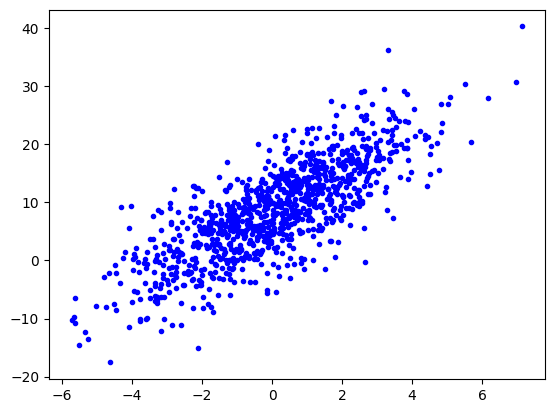

In [75]:
plt.plot(x3, y, 'b.')  # x3 has positive affects on y because of +3

Data preparation

In [76]:
one = np.ones((N, 1))  # because of w0
X = np.hstack((one, x1, x2, x3, x4))   # X ==> [1, x1, x2, x3, x4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1000, 5)
(1000, 1)
(800, 5)
(200, 5)
(800, 1)
(200, 1)


formula of page 7 that calculate w for us

In [77]:
x = np.array([[1,2],[3,4]])
y = np.array([[1,2],[3,4]])
print('x:\n',x, '\n')
print('y:\n',y, '\n')
print(np.matmul(x, y), '\n')
print('x.T:\n', x.T, '\n')   # transpose of a matrix: https://www.mathsisfun.com/algebra/matrix-introduction.html
print('x inverse:\n', np.linalg.inv(x), '\n')  # inverse of a matrix: https://www.mathsisfun.com/algebra/matrix-inverse.html

x:
 [[1 2]
 [3 4]] 

y:
 [[1 2]
 [3 4]] 

[[ 7 10]
 [15 22]] 

x.T:
 [[1 3]
 [2 4]] 

x inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]] 



In [78]:
X_T_X_train = np.matmul(X_train.T, X_train)
X_T_Y_train = np.matmul(X_train.T, y_train)
w = np.matmul(np.linalg.inv(X_T_X_train), X_T_Y_train)
print(w)
print(generated_weight)


[[ 0.48195066]
 [-3.02637187]
 [ 4.00945581]
 [ 3.007124  ]
 [-0.05834039]]
[ 0.5  3.   4.   3.  -0.5]


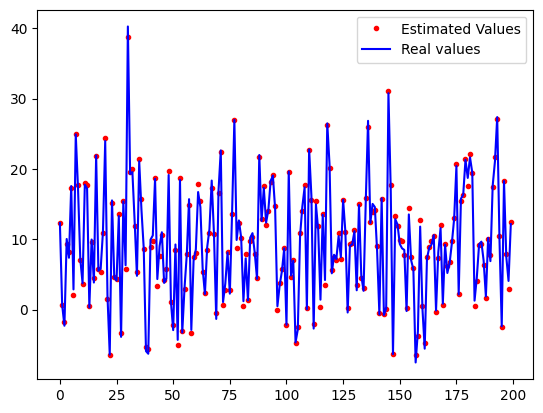

In [79]:
y_pre = np.matmul(X_test, w)

plt.plot(y_pre, 'r.')
plt.plot(y_test, 'b-')
plt.legend(['Estimated Values', 'Real values'])

### Evaluation of the Errors
if error mean and standard deviation is near to probability features of data set model is a good model  so so!!!!

0.006471620642394895
0.5357363813785384


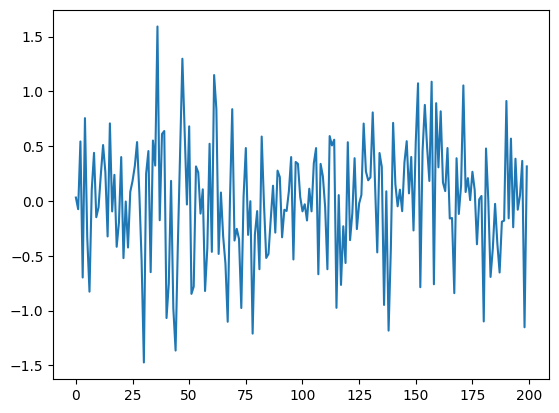

In [82]:
error = y_pre - y_test
print(np.mean(error))
print(np.std(error))
plt.plot(error)

## simple regression: non-iid Measurements

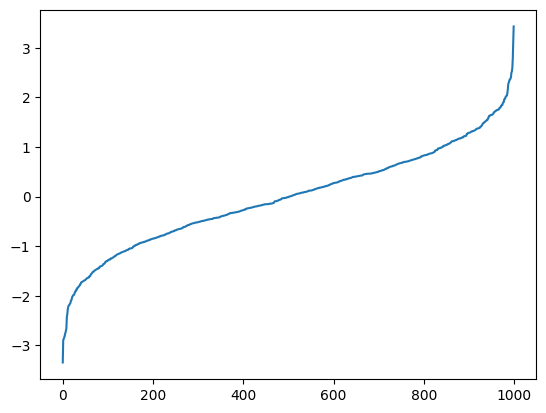

In [87]:
z = np.random.randn(1000, 1)
z.sort(0)
plt.plot(z)

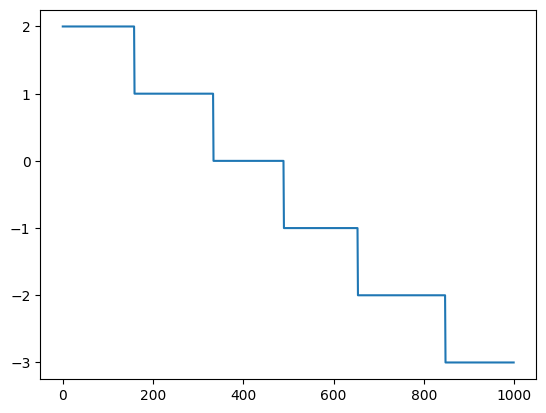

In [88]:
z = []
for i in range(1000):
    sigma = np.random.randint(-3, 3)
    z.append(sigma)
z.sort(reverse=True)
plt.plot(z)

In [94]:
print(np.exp(1))

2.718281828459045


#### How to Weight the Measurements?
1 - Consider the convariance matrix of noide as the weight matrix, if available!

2 - Do some LS estimation and consider the variance of noise as the weight matrix

3 - Calculate the distance between data points and the mean of data==> this is used

#### Data Preparing

In [96]:
distance = np.exp(np.abs((X_train - np.mean(X_train))))
mean = np.mean(distance, axis=1).reshape(-1, 1)
weights = np.diagflat(np.matrix(mean))
X_T_Q_train = np.matmul(X_train.T, np.linalg.inv(weights))
X_T_Q_train.shape
X_T_Q_X_train = np.matmul(X_T_Q_train, X_train)
X_T_Q_Y_train = np.matmul(X_T_Q_train, y_train)
W = np.matmul(np.linalg.inv(X_T_Q_X_train), X_T_Q_Y_train)
W

matrix([[ 0.43804515],
        [-3.02265428],
        [ 4.01923391],
        [ 3.01045091],
        [-0.04506263]])